In [27]:
#Librerie e funzioni importate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#Caricamento e analisi iniziale dei dati
data = pd.read_csv('movie_info.csv')
print(data.head())

                          movie_title  release_date  season  phase  \
0                            Iron Man    May 2 2008       1      1   
1                 The Incredible Hulk  June 13 2008       1      1   
2                          Iron Man 2    May 7 2010       1      1   
3                                Thor    May 6 2011       1      1   
4  Captain America: The First Avenger  July 22 2011       2      1   

   production_budget_in_million_(USD)  worldwide_collection_in_million_(USD)  \
0                                 140                                 585.37   
1                                 150                                 264.77   
2                                 200                                 623.93   
3                                 150                                 449.33   
4                                 140                                 370.57   

   tomatometer  tomato_audience_score  imdb  metascore  meta_user_score  
0          9.4          

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   movie_title                            27 non-null     object 
 1   release_date                           27 non-null     object 
 2   season                                 27 non-null     int64  
 3   phase                                  27 non-null     int64  
 4   production_budget_in_million_(USD)     27 non-null     int64  
 5   worldwide_collection_in_million_(USD)  27 non-null     float64
 6   tomatometer                            27 non-null     float64
 7   tomato_audience_score                  27 non-null     float64
 8   imdb                                   27 non-null     float64
 9   metascore                              27 non-null     float64
 10  meta_user_score                        27 non-null     float64
dtypes: float

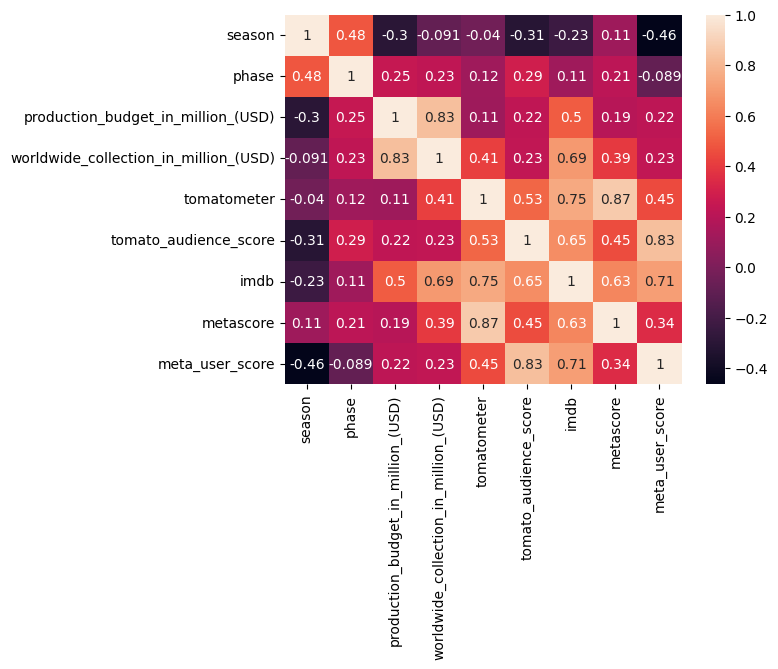

In [4]:
# Calcolo della matrice di correlazione
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

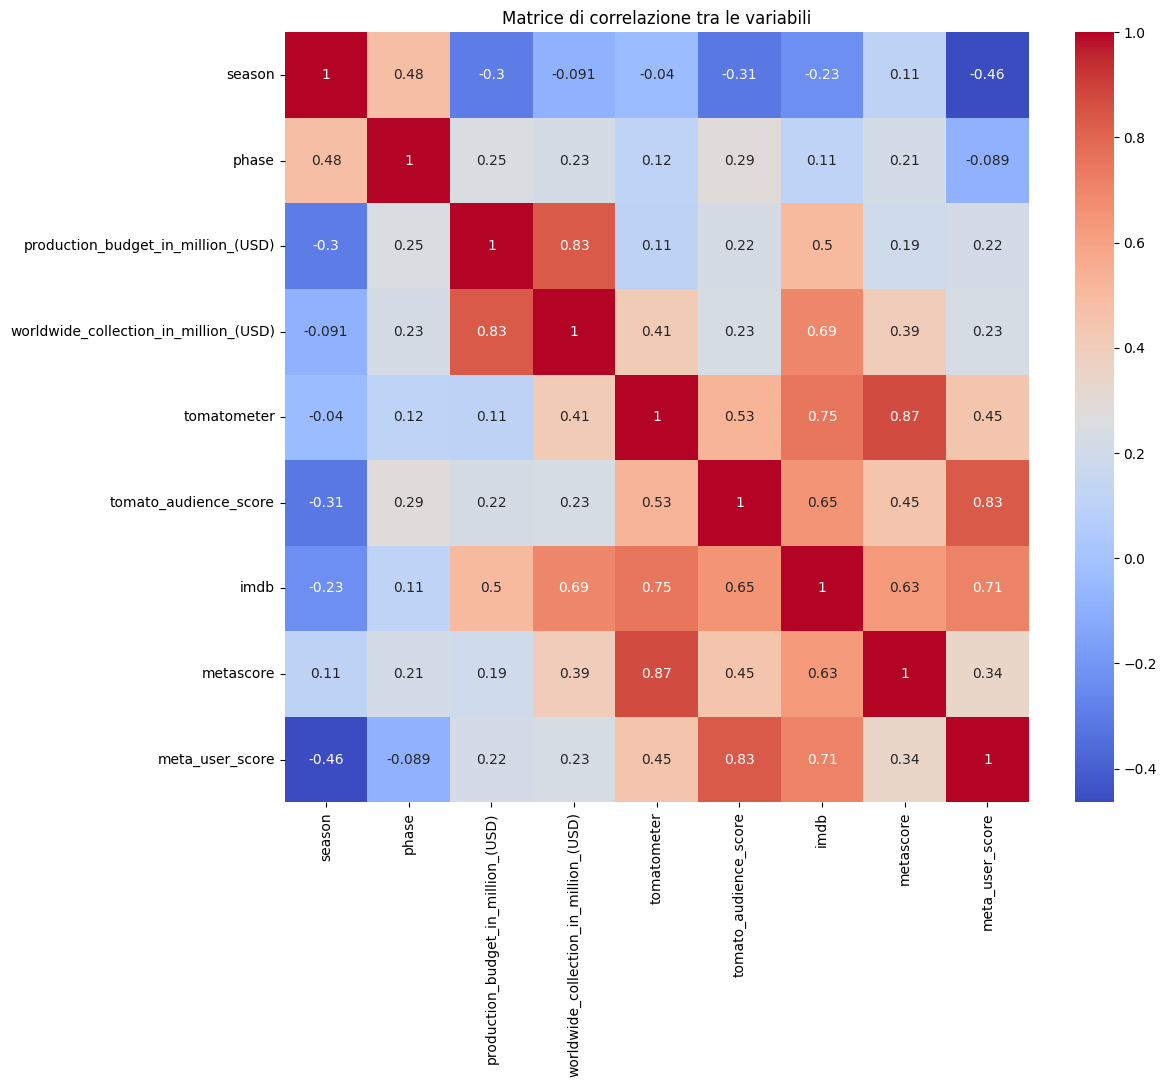

In [5]:
# Grafico migliorato per vedere meglio le correlazioni maggiori
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di correlazione tra le variabili')
plt.show()

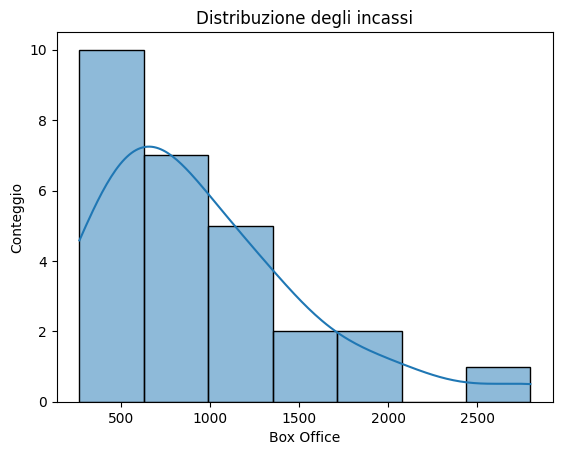

In [6]:
# Distribuzione degli incassi
sns.histplot(data['worldwide_collection_in_million_(USD)'], kde=True)
plt.xlabel('Box Office')
plt.ylabel('Conteggio')
plt.title('Distribuzione degli incassi')
plt.show()

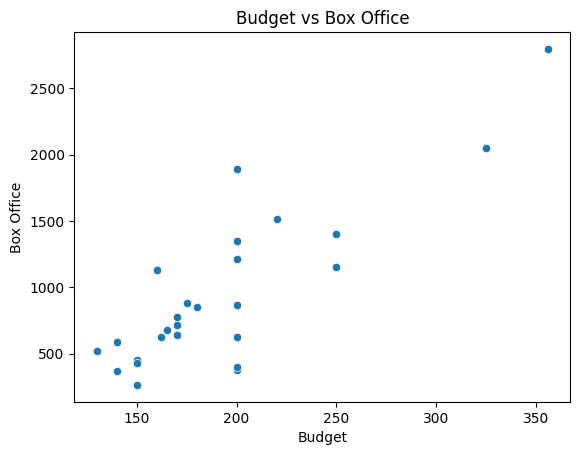

In [7]:
# Scatterplot tra budget e incasso
sns.scatterplot(x=data['production_budget_in_million_(USD)'], y=data['worldwide_collection_in_million_(USD)'])
plt.xlabel('Budget')
plt.ylabel('Box Office')
plt.title('Budget vs Box Office')
plt.show()

In [8]:
# Seleziona solo le correlazioni relative alla variabile target
target_corr = corr_matrix['worldwide_collection_in_million_(USD)']

In [9]:
# Stabilisce una soglia di correlazione
threshold = 0.80

In [10]:
# Seleziona le colonne con una correlazione superiore alla soglia
selected_columns = target_corr[abs(target_corr) > threshold].index

In [11]:
# Mantiene solo le colonne selezionate nel dataset
data = data[selected_columns]

In [12]:
# Preparazione del dataset
X = data.drop('worldwide_collection_in_million_(USD)', axis=1)
y = data['worldwide_collection_in_million_(USD)']

In [13]:
# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Modelli da confrontare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}

In [15]:
# Addestramento e valutazione dei modelli
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse}')

Linear Regression RMSE: 216.82065088286726
Decision Tree RMSE: 330.1243852954014
Random Forest RMSE: 441.76383698312895


In [16]:
# Addestramento e valutazione dei modelli
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    r2_score = model.score(X_test, y_test)
    print(f'{name} RMSE: {rmse}')
    print(f'{name} MSE: {mse}')
    print(f'{name} R²: {r2_score}')
    print(f'-')

Linear Regression RMSE: 216.82065088286726
Linear Regression MSE: 47011.194649270205
Linear Regression R²: 0.9271136952401947
-
Decision Tree RMSE: 330.1243852954014
Decision Tree MSE: 108982.10976666665
Decision Tree R²: 0.8310337925874614
-
Random Forest RMSE: 441.76383698312895
Random Forest MSE: 195155.2876660565
Random Forest R²: 0.6974306252279747
-


In [17]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = cross_val_score(model, X, y, cv=10, scoring='r2').mean()
    print(f'{name} CV RMSE: {rmse}')
    print(f'{name} MSE: {mse}')
    print(f'{name} R²: {r2}')
    print(f'-')

Linear Regression CV RMSE: 326.8505781878882
Linear Regression MSE: 109371.70000194876
Linear Regression R²: -35.50378692335683
-
Decision Tree CV RMSE: 374.96430177471024
Decision Tree MSE: 94849.92066331569
Decision Tree R²: -33.62959811153188
-
Random Forest CV RMSE: 369.2760250385632
Random Forest MSE: 120335.24745526299
Random Forest R²: -38.51175435920922
-


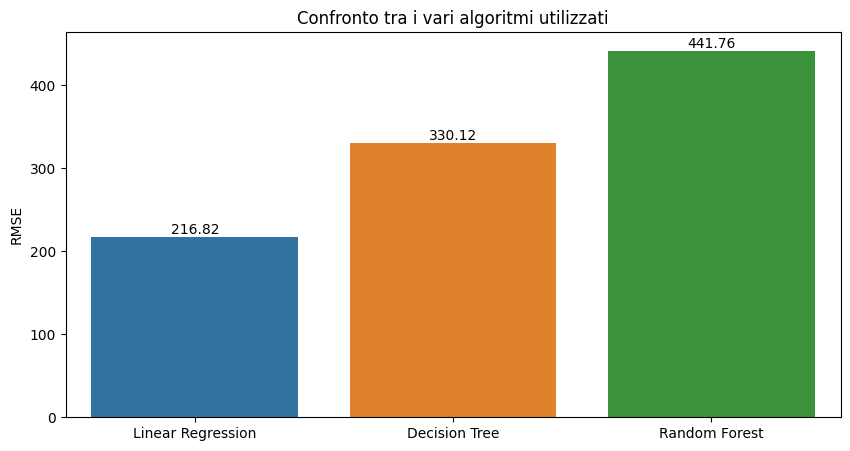

In [18]:
# Creazione di un grafico a barre per confrontare i vari algoritmi
rmse_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_scores[name] = rmse

# Stampa del grafico a barre base
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()))
plt.ylabel('RMSE')
plt.title('Confronto tra i vari algoritmi utilizzati')

# Aggiunta dei valori del grafico a barre
for i, v in enumerate(rmse_scores.values()):
    ax.text(i, v, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.show()    

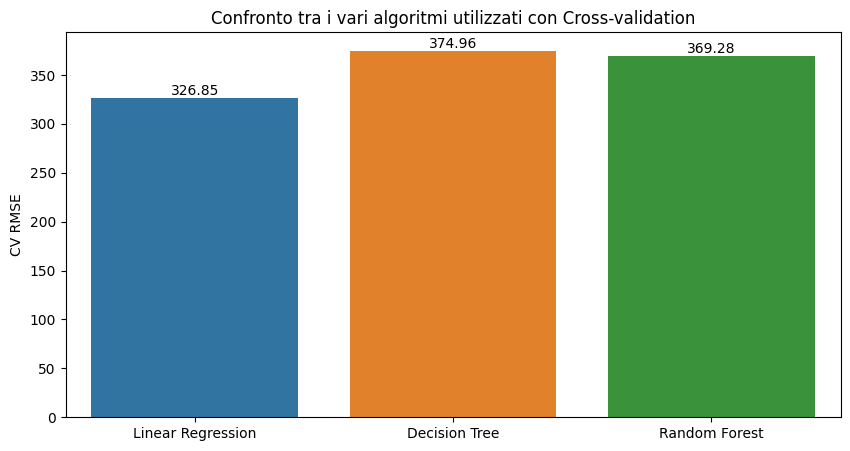

In [19]:
# Creazione di un grafico a barre per confrontare i vari algoritmi Ottimizzati
cv_rmse_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')
    cv_rmse_scores[name] = -scores.mean()
    
# Stampa del grafico a barre ottimaizzato
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(cv_rmse_scores.keys()), y=list(cv_rmse_scores.values()))
plt.ylabel('CV RMSE')
plt.title('Confronto tra i vari algoritmi utilizzati con Cross-validation')

# Aggiunta dei valori del grafico a barre
for i, v in enumerate(cv_rmse_scores.values()):
    ax.text(i, v, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.show()

In [20]:
# Definizione della griglia di parametri per l'ottimizzazione degli iperparametri
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [21]:
# Ottimizzazione degli iperparametri con ricerca esaustiva Grid Search 
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=10, scoring='neg_root_mean_squared_error')
grid_search_rf.fit(X, y)
print('Best parameters:', grid_search_rf.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
# Addestramento e valutazione del modello ottimizzato
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
r2_score = best_rf.score(X_test, y_test)
print(f'Optimized Random Forest RMSE: {rmse}')
print(f'Optimized Random Forest MSE: {mse}')
print(f'Optimized Random Forest R²: {r2_score}')

Optimized Random Forest RMSE: 423.26971165966916
Optimized Random Forest MSE: 179157.24880845947
Optimized Random Forest R²: 0.7222340352334707


In [23]:
# Definizione della griglia di parametri per l'ottimizzazione degli iperparametri GRADIENT BOOSTING
param_grid_gb = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [24]:
# Ottimizzazione degli iperparametri con ricerca esaustiva Grid Search e GradientBoosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=10, scoring='neg_root_mean_squared_error')
grid_search_gb.fit(X, y)
print('Best parameters:', grid_search_gb.best_params_)

Best parameters: {'learning_rate': 0.2, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


In [25]:
# Addestramento e valutazione del modello ottimizzato con GRID SEARCH con GradientBoosting
best_gb = grid_search_gb.best_estimator_
best_gb.fit(X_train, y_train)
y_pred = best_gb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
r2_score = best_gb.score(X_test, y_test)
print(f'Optimized Gradient boosting RMSE: {rmse}')
print(f'Optimized Gradient boosting MSE: {mse}')
print(f'Optimized Gradient boosting R²: {r2_score}')

Optimized Gradient boosting RMSE: 375.88267666511643
Optimized Gradient boosting MSE: 141287.78661693246
Optimized Gradient boosting R²: 0.780946969098988


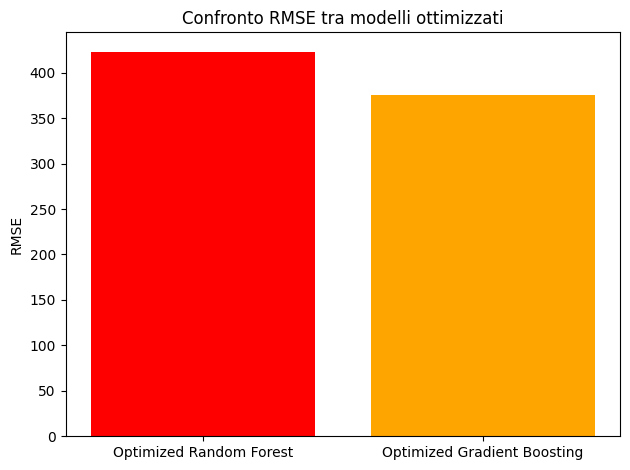

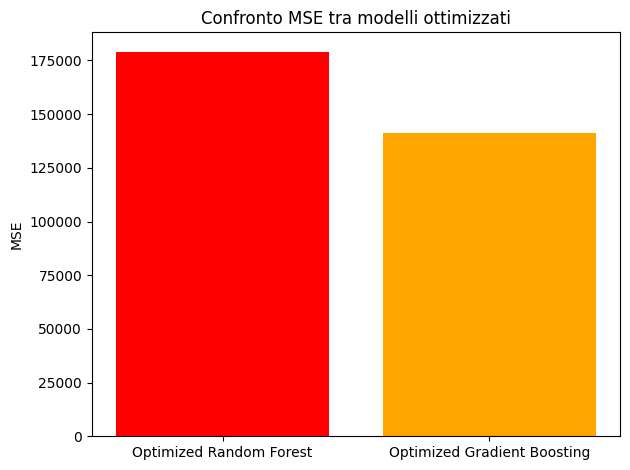

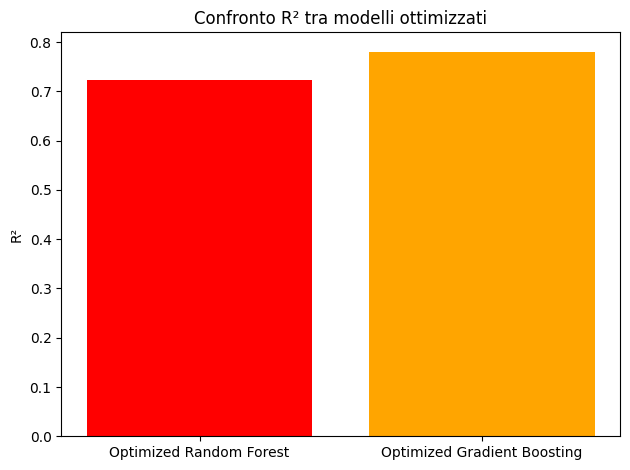

In [28]:
# Dati per il grafico
model_names = ['Optimized Random Forest', 'Optimized Gradient Boosting']
rmse_values = [423.26971165966916, 375.88267666511643]
mse_values = [179157.24880845947, 141287.78661693246]
r2_scores = [0.7222340352334707, 0.780946969098988]

# Creazione dei grafici
x = np.arange(len(model_names))

# Grafico RMSE
fig1, ax1 = plt.subplots()
rects1 = ax1.bar(x, rmse_values, color=['red', 'orange'])
ax1.set_ylabel('RMSE')
ax1.set_title('Confronto RMSE tra modelli ottimizzati')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
fig1.tight_layout()

# Grafico MSE
fig2, ax2 = plt.subplots()
rects2 = ax2.bar(x, mse_values, color=['red', 'orange'])
ax2.set_ylabel('MSE')
ax2.set_title('Confronto MSE tra modelli ottimizzati')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names)
fig2.tight_layout()

# Grafico R²
fig3, ax3 = plt.subplots()
rects3 = ax3.bar(x, r2_scores, color=['red', 'orange'])
ax3.set_ylabel('R²')
ax3.set_title('Confronto R² tra modelli ottimizzati')
ax3.set_xticks(x)
ax3.set_xticklabels(model_names)
fig3.tight_layout()

# Mostra i grafici
plt.show()